In [68]:
%matplotlib inline

Here it is a mathematical definition of the leaky echo-state network and a description of my "dynamic-rotation" trick.

### Leaky Echo-State
The dynamical system is a recurrent network of leaky units with a sigmoidal output function:

$$
\begin{align}
\tau\dot{\mathbf{x}} &= -\mathbf{x} + \mathbf{W}\tanh\left(\mathbf{x}\right)
&&\mathbf{x} \in \mathbb{R}^N,  \mathbf{W} \in \mathbb{R}^{N\times N}
\end{align}
$$

The only constraint defining echo-state networks compared to other recurrent networks is:

$$
\begin{align}
1-\epsilon <  \rho\left(\mathbf{V}\right)  < 1 &&
\end{align}
$$

where $\mathbf{V}$ is the correction of the weight matrix accounting for leakyness

$$
\begin{align}
\mathbf{V} = \frac{\delta t}{\tau}\mathbf{W} + \left(1 - \frac{\delta t}{\tau}\right)I &&\\
\end{align}
$$

and $\rho\left(\mathbf{M}\right)$ si the spectral radius of the matrix 

$$
\begin{align}
\rho\left(\mathbf{M}\right) = \max_i\left(\left|\lambda^\mathbf{M}_i \right|\right)
\end{align}
$$

### Finding $\mathbf{W}$

Given the constraint above, we can find the weights through an iterative algorithm:

spectral radius = 100


(-100, 100)

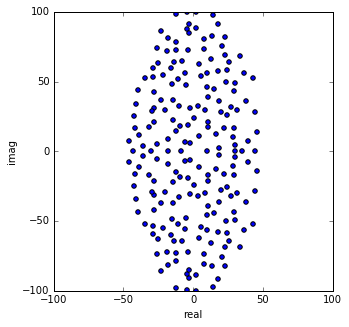

In [69]:
import numpy as np
import matplotlib.pyplot as plt 

def evaluate_rho(m) :
    '''
    Spectral radius of a square matrix
    '''
    return np.max(np.abs(np.linalg.eigvals(m)))


n = 200   # number of unit in the network
h = 0.1    # integration step (dt/tau)
epsilon = 0.00000001    # an arbitrarily small quantity
alpha = 0.6    # proportion of rotation

# convenience alias for the identity matrix
I = np.eye(n,n)
    
# initialize a random matrix
W = np.random.randn(n,n) 
  
# decompose
W1 = (W - W.T)/2.   # rotation
W2 = (W + W.T)/2.   # expansion/rotation
   
# recompose
W = alpha*W1 + (1-alpha)*W2  
 
# normalize W so that rho = 1
W = W/evaluate_rho(W)

# the iteration has to reach this value 
target = 1.0 - epsilon/2.0
        
# initial estimate of required rho
rho_estimate = 100

# compute the effective matrix
V = h*rho_estimate*W + (1-h)*I 

# initial estimate of effective rho
effective_rho_estimate = evaluate_rho(e_W)

# while rho of the effective matrix is not 
while not ( target < effective_rho_estimate <1.0) :
    
    # compute the effective matrix
    V = h*rho_estimate*W + (1-h)*I
        
    # compute the effective matrix
    effective_rho_estimate = evaluate_rho(V)
    
    # update the estimate of rho so that the estimate of the
    # effective rho get closer to the target
    rho_estimate += (1.0/h)*(target-effective_rho_estimate)
    
# we found the correct spectral radius 
# changing W consequently 
W = rho_estimate*W

print "spectral radius = {}".format(rho_estimate)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

d = np.linalg.eigvals(W)
ax.scatter(np.real(d), np.imag(d))
ax.set_xlabel("real")
ax.set_ylabel("imag")
ax.set_xlim([-rho_estimate,rho_estimate])
ax.set_ylim([-rho_estimate,rho_estimate])



### The values of $\alpha$
The function demo() in the script [dynrot.py](dynrot.py) simulates the activation due to a sparse inpulsive input of ESN networks with different values of $\alpha$. 

The greater is $\alpha$, the greater is the variance of the real part of the eigenvalues of $\mathbf{W}$. Inversely, the variance of the imaginary part of the eigenvalues of $\mathbf{W}$ decreases as $\alpha$ increases. 

In the graphics below the trajectory defined by the first 3 principal components of the time-series of the activations of units is also shown.


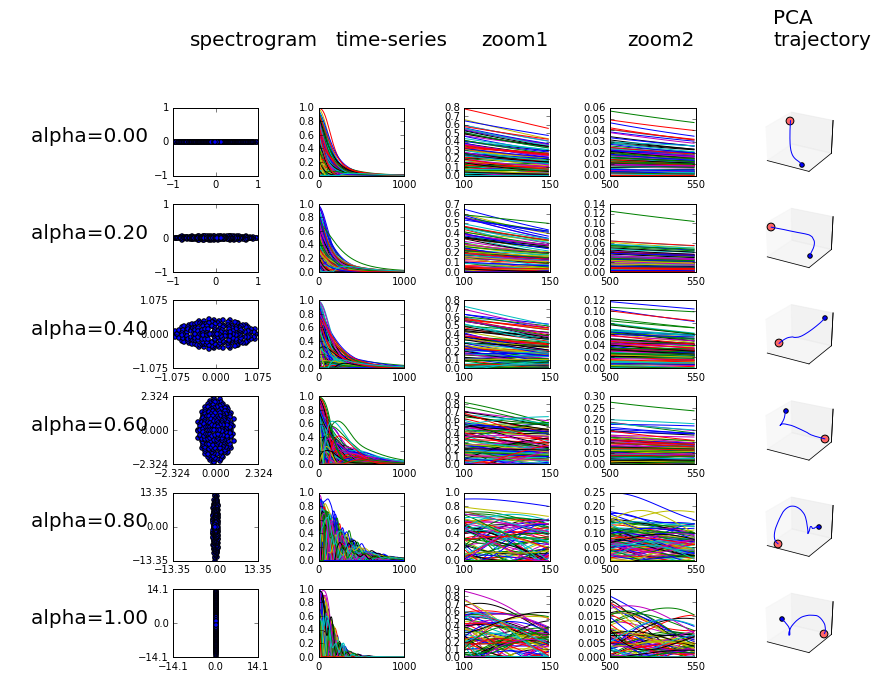

In [70]:
import  dynrot 
dynrot.demo()